**Librerias**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pylab as plt
import math
import plotly.express as px

**Carga de Datos**

In [ ]:

df = pd.read_csv("C:/Users/eserrano/Desktop/Maestria/Analitica_Predictiva/dataset2.csv")
df.head()

**Analisis Exploratorio**

In [3]:
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (2864056, 33)
Nombre columnas: Index(['activityID', 'heart_rate', 'hand temperature (°C)',
       'hand acceleration X ±16g', 'hand acceleration Y ±16g',
       'hand acceleration Z ±16g', 'hand gyroscope X', 'hand gyroscope Y',
       'hand gyroscope Z', 'hand magnetometer X', 'hand magnetometer Y',
       'hand magnetometer Z', 'chest temperature (°C)',
       'chest acceleration X ±16g', 'chest acceleration Y ±16g',
       'chest acceleration Z ±16g', 'chest gyroscope X', 'chest gyroscope Y',
       'chest gyroscope Z', 'chest magnetometer X', 'chest magnetometer Y',
       'chest magnetometer Z', 'ankle temperature (°C)',
       'ankle acceleration X ±16g', 'ankle acceleration Y ±16g',
       'ankle acceleration Z ±16g', 'ankle gyroscope X', 'ankle gyroscope Y',
       'ankle gyroscope Z', 'ankle magnetometer X', 'ankle magnetometer Y',
       'ankle magnetometer Z', 'PeopleId'],
      dtype='object')


In [4]:
##Columnas, nulos y tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864056 entries, 0 to 2864055
Data columns (total 33 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   activityID                 object 
 1   heart_rate                 float64
 2   hand temperature (°C)      float64
 3   hand acceleration X ±16g   float64
 4   hand acceleration Y ±16g   float64
 5   hand acceleration Z ±16g   float64
 6   hand gyroscope X           float64
 7   hand gyroscope Y           float64
 8   hand gyroscope Z           float64
 9   hand magnetometer X        float64
 10  hand magnetometer Y        float64
 11  hand magnetometer Z        float64
 12  chest temperature (°C)     float64
 13  chest acceleration X ±16g  float64
 14  chest acceleration Y ±16g  float64
 15  chest acceleration Z ±16g  float64
 16  chest gyroscope X          float64
 17  chest gyroscope Y          float64
 18  chest gyroscope Z          float64
 19  chest magnetometer X       float64
 20  ch

In [5]:
## Valores Duplicados
df.duplicated().sum()

0

In [6]:
## Cantidad nulos 
df.isnull().sum()

activityID                    0
heart_rate                   46
hand temperature (°C)         0
hand acceleration X ±16g      0
hand acceleration Y ±16g      0
hand acceleration Z ±16g      0
hand gyroscope X              0
hand gyroscope Y              0
hand gyroscope Z              0
hand magnetometer X           0
hand magnetometer Y           0
hand magnetometer Z           0
chest temperature (°C)        0
chest acceleration X ±16g     0
chest acceleration Y ±16g     0
chest acceleration Z ±16g     0
chest gyroscope X             0
chest gyroscope Y             0
chest gyroscope Z             0
chest magnetometer X          0
chest magnetometer Y          0
chest magnetometer Z          0
ankle temperature (°C)        0
ankle acceleration X ±16g     0
ankle acceleration Y ±16g     0
ankle acceleration Z ±16g     0
ankle gyroscope X             0
ankle gyroscope Y             0
ankle gyroscope Z             0
ankle magnetometer X          0
ankle magnetometer Y          0
ankle ma

In [7]:
## Valores unicos de la etiqueta activityID
df['activityID'].unique(), df['activityID'].nunique()

(array(['transient activities', 'lying', 'sitting', 'standing', 'ironing',
        'vacuum cleaning', 'ascending stairs', 'descending stairs',
        'walking', 'Nordic walking', 'cycling', 'running', 'rope jumping'],
       dtype=object),
 13)

In [8]:
## descripción estadística de los datos numéricos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
heart_rate,2864010.0,109.770262,25.831303,57.00000,90.000000,108.000000,125.000000,202.00000
hand temperature (°C),2864056.0,32.670502,1.800771,27.43750,31.437500,33.125000,34.000000,35.50000
hand acceleration X ±16g,2864056.0,-4.978788,5.989589,-145.36700,-9.038570,-5.818260,-0.802033,62.85960
hand acceleration Y ±16g,2864056.0,3.575225,6.260608,-104.30100,1.294029,3.568640,6.588192,155.69900
hand acceleration Z ±16g,2864056.0,3.174904,3.828842,-101.45200,0.973596,2.961145,5.996195,156.94900
hand gyroscope X,2864056.0,-0.003881,1.298024,-27.80440,-0.347742,-0.006158,0.303054,26.41580
hand gyroscope Y,2864056.0,0.032132,0.884282,-22.21270,-0.197064,0.006137,0.236658,16.98350
hand gyroscope Z,2864056.0,-0.006986,1.453340,-16.69970,-0.302894,-0.005385,0.292429,14.33840
hand magnetometer X,2864056.0,21.253435,24.026932,-103.94100,5.345607,24.283850,39.250000,172.59000
hand magnetometer Y,2864056.0,-14.321206,24.094303,-200.04300,-29.517225,-16.454400,1.765928,121.17600


C:\Users\eserrano\AppData\Local\Temp\ipykernel_6996\3667993058.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


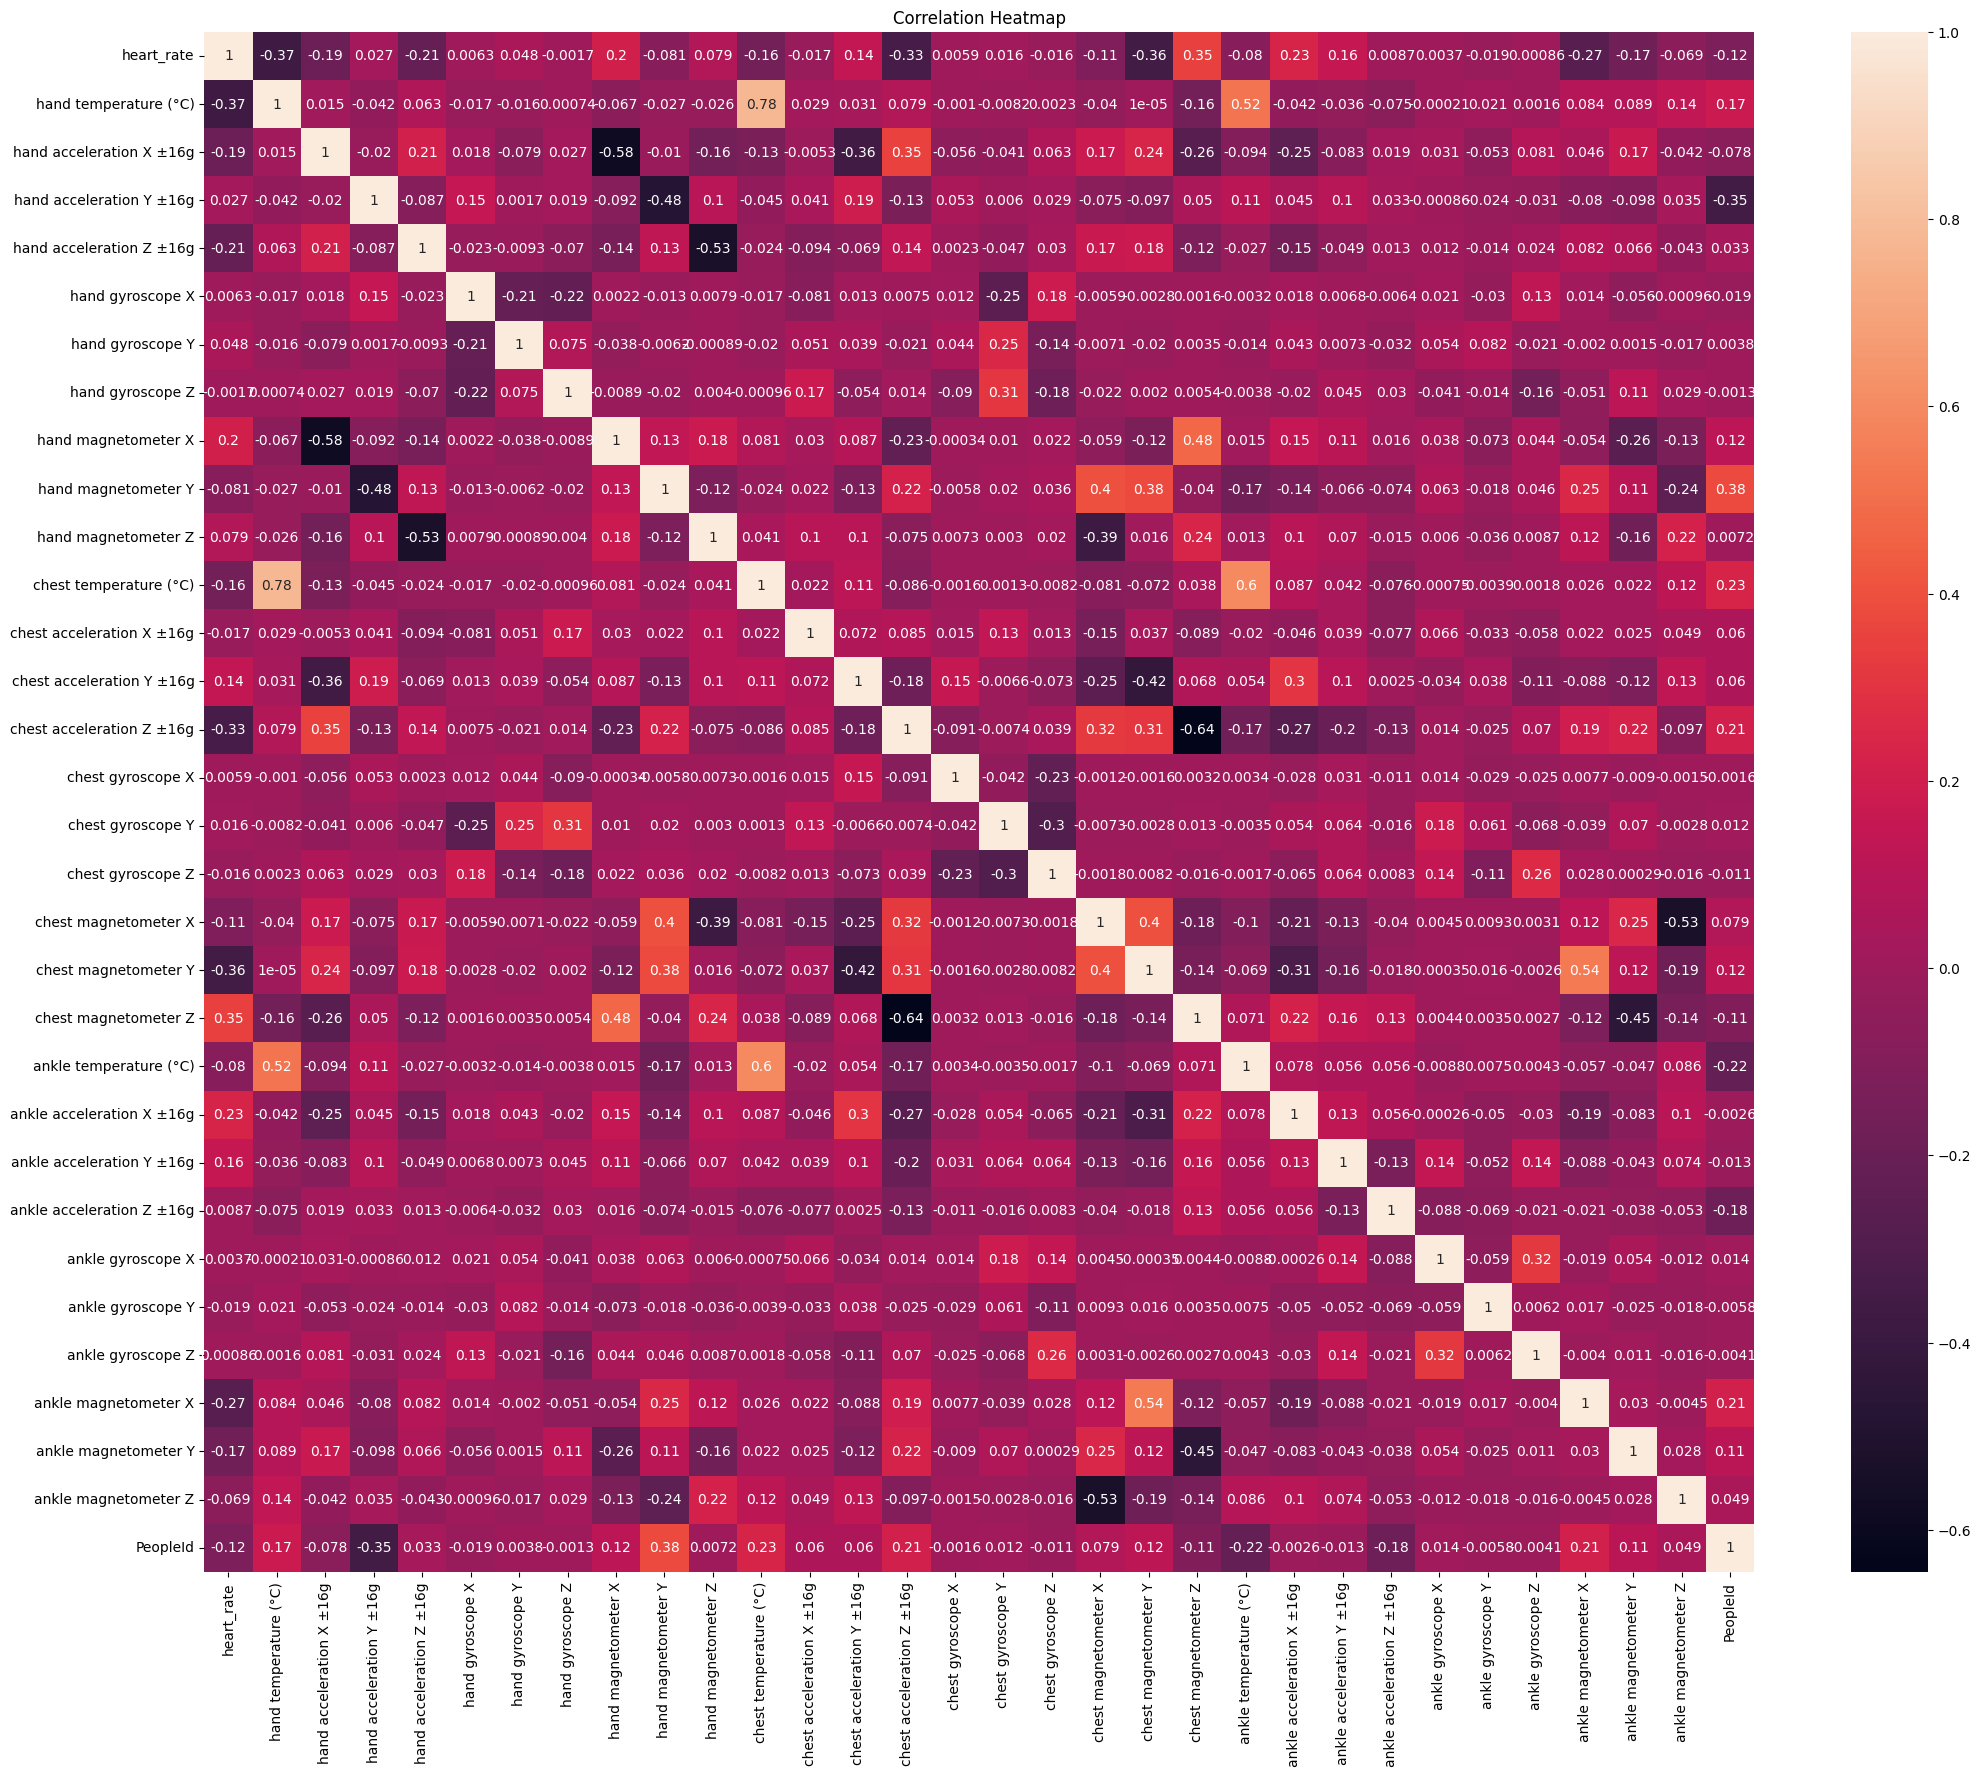

In [9]:
## Matriz de Correlación
corr_mat = df.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Heatmap')
plt.show()

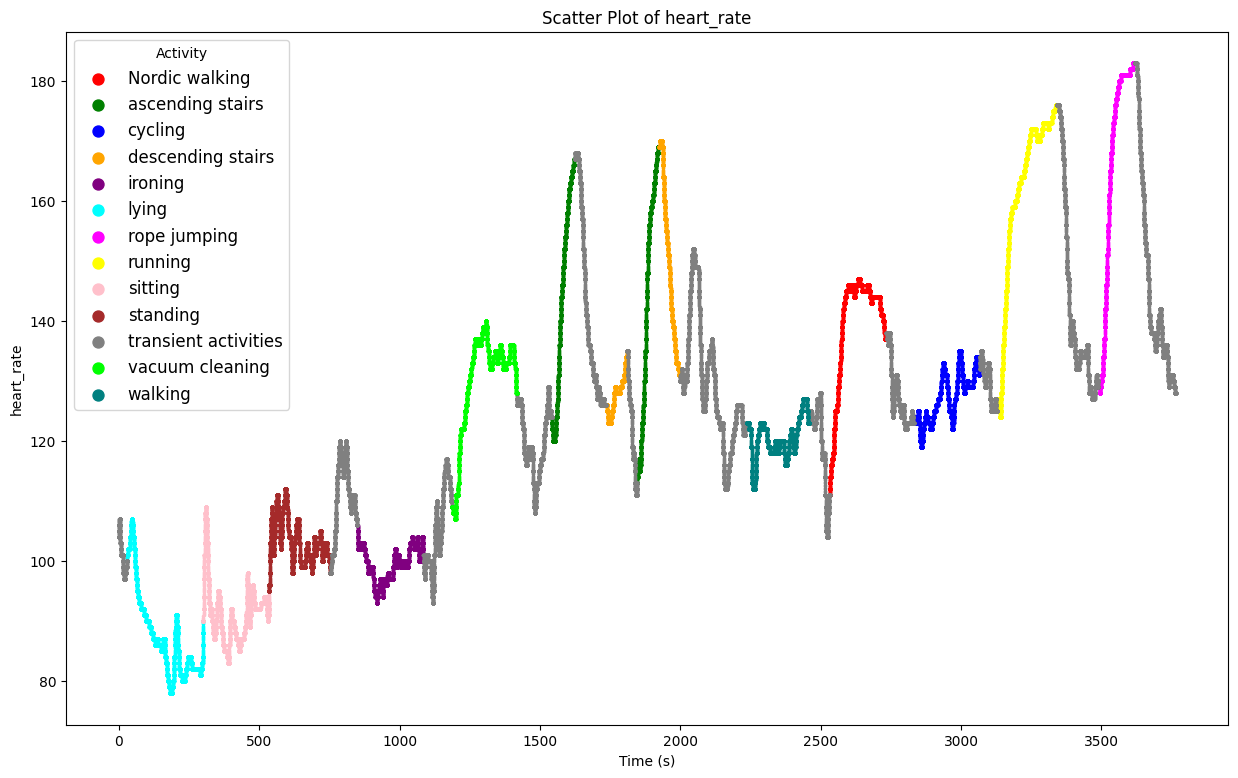

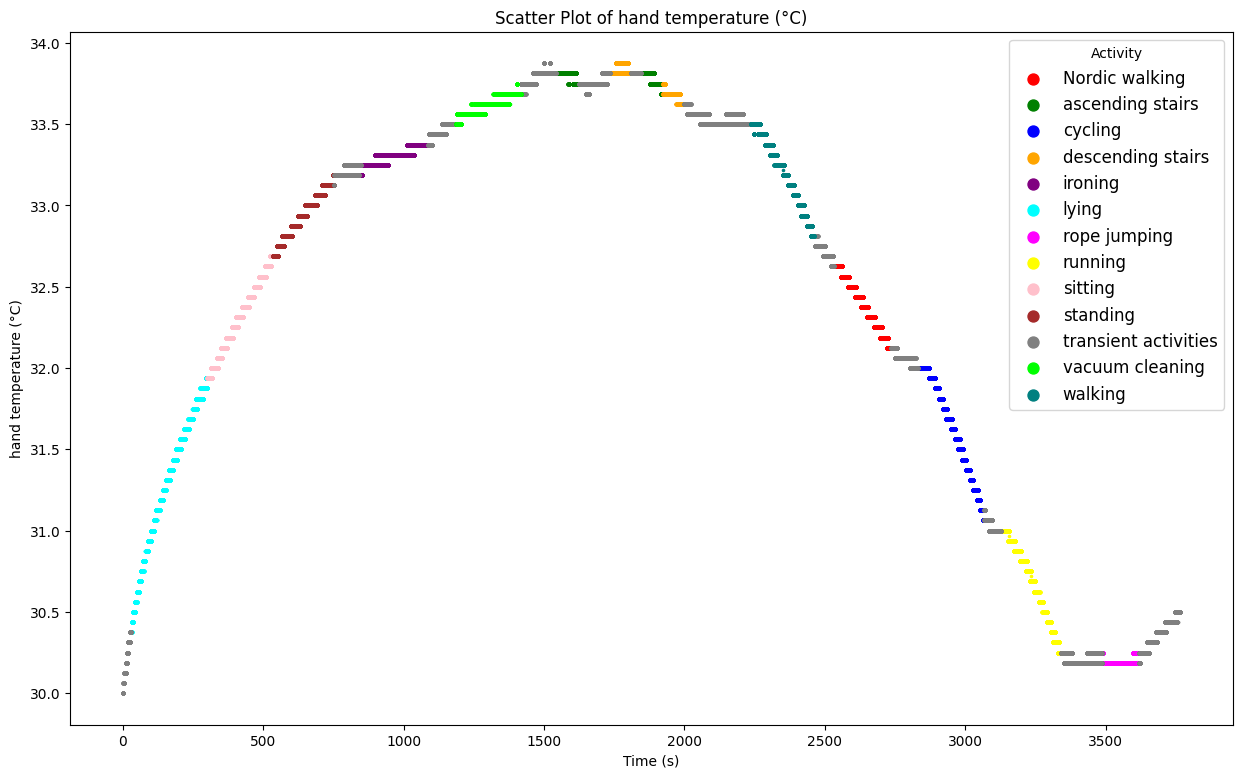

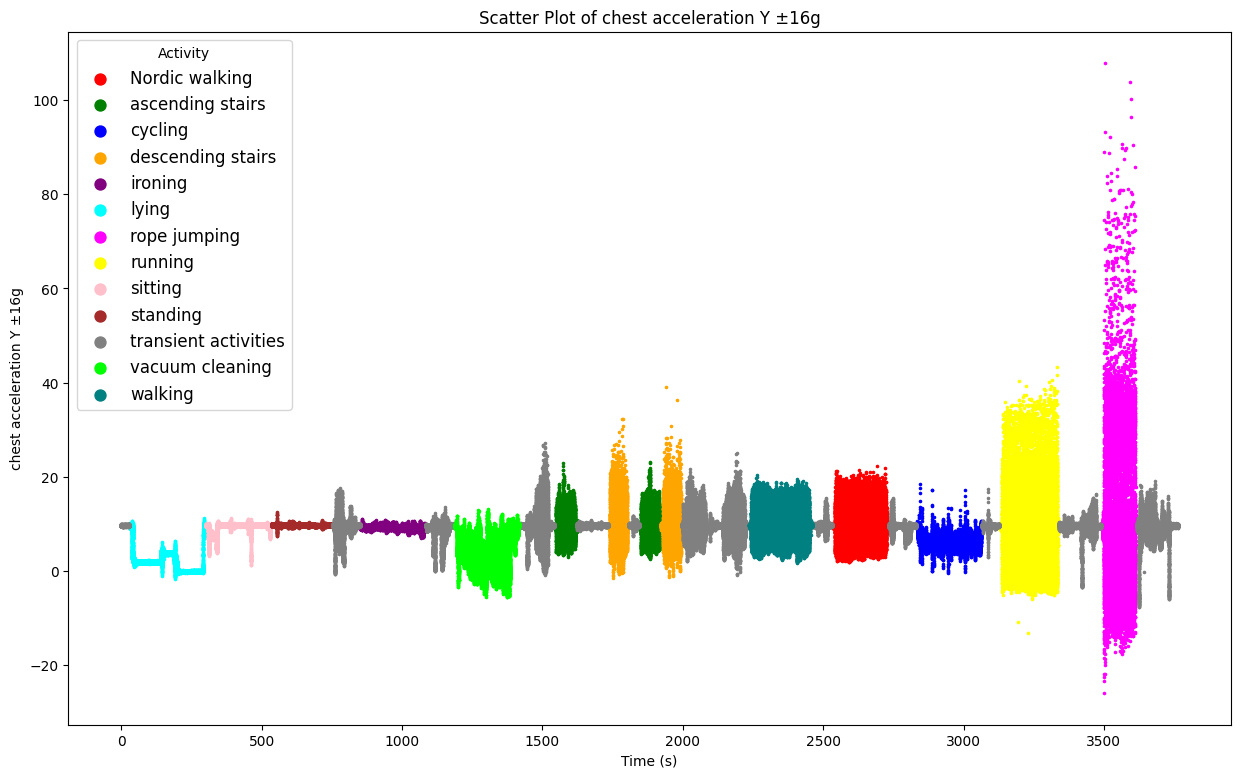

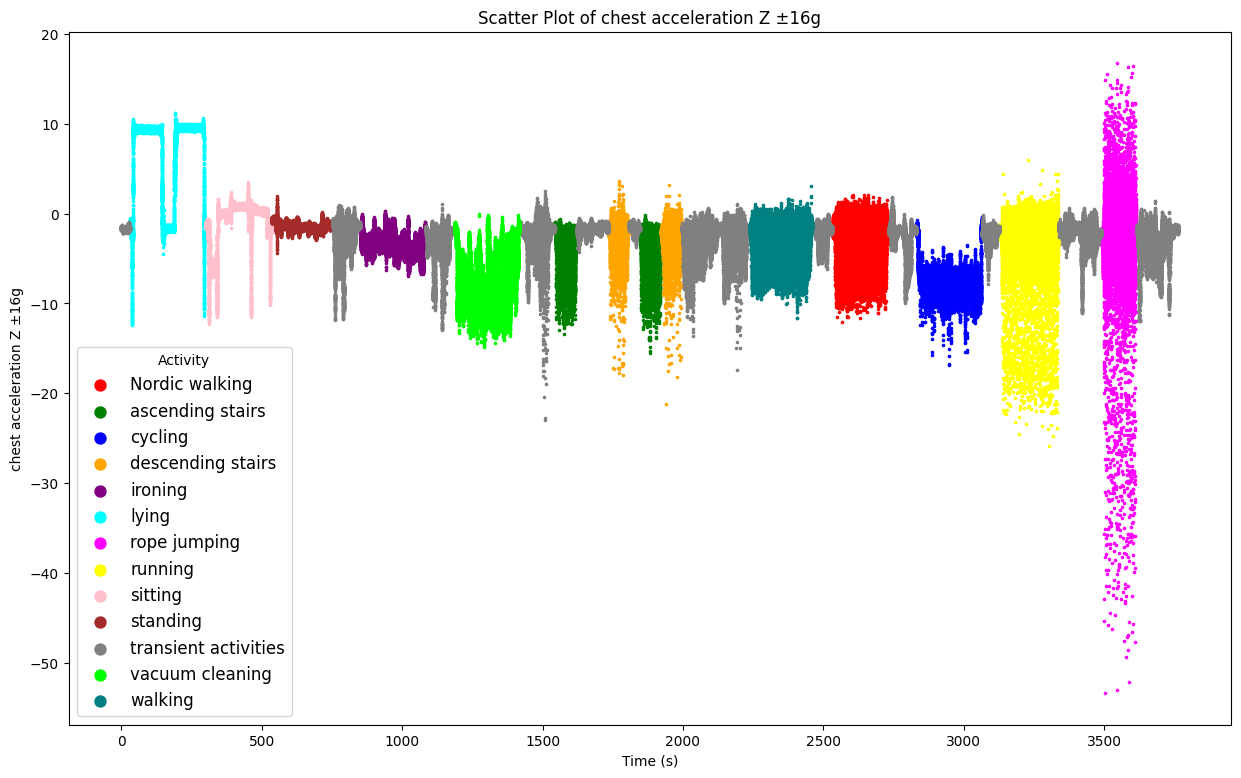

In [10]:
## Tiempo por actividad

features = ['heart_rate','hand temperature (°C)','chest acceleration Y ±16g', 'chest acceleration Z ±16g',]
df1 = df[df.PeopleId == 1]
t = np.array([0.01*i for i in range(len(df1))])
class_labels = np.unique(df1["activityID"])
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'pink', 'brown', 'gray', 'lime', 'teal']

for feature in features:

    feat = df1[feature]



    plt.figure(figsize=(15, 9))
    for i, class_label in enumerate(class_labels):
        mask = (df1["activityID"] == class_label)
        plt.scatter(t[mask], feat[mask], s=2.5, c=colors[i], label=class_label)
    plt.legend(title='Activity',fontsize='large',markerscale=5)

    plt.xlabel('Time (s)')
    plt.ylabel(feature)
    plt.title(f'Scatter Plot of {feature}')

    plt.show()

# **Análisis Predictivo**

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [12]:
# Seleccionar las columnas relevantes
X = df.iloc[:, 1:-1].values
y = df.iloc[:, 0].values
print(X)
print(y)

[[104.       30.        2.37223 ... -61.1888  -38.9599  -58.1438 ]
 [104.       30.        2.18837 ... -59.8479  -38.8919  -58.5253 ]
 [104.       30.        2.37357 ... -60.7361  -39.4138  -58.3999 ]
 ...
 [140.       30.8125   -9.42745 ... -38.5541  -16.0535   24.6936 ]
 [140.       30.8125   -9.47246 ... -38.8064  -16.04     24.9763 ]
 [140.       30.8125   -9.66621 ... -38.6814  -15.9175   24.9766 ]]
['transient activities' 'transient activities' 'transient activities' ...
 'transient activities' 'transient activities' 'transient activities']


['Nordic walking', 'ascending stairs', 'cycling', 'descending stairs', 'ironing', 'lying', 'rope jumping', 'running', 'sitting', 'standing', 'transient activities', 'vacuum cleaning', 'walking']
Counter({10: 927575, 12: 238761, 4: 238690, 5: 192523, 9: 189931, 0: 188107, 8: 185188, 11: 175353, 2: 164600, 1: 117216, 3: 104944, 7: 98199, 6: 42969})
Class=10, n=927575 (32.387%)
Class=5, n=192523 (6.722%)
Class=8, n=185188 (6.466%)
Class=9, n=189931 (6.632%)
Class=4, n=238690 (8.334%)
Class=11, n=175353 (6.123%)
Class=1, n=117216 (4.093%)
Class=3, n=104944 (3.664%)
Class=12, n=238761 (8.336%)
Class=0, n=188107 (6.568%)
Class=2, n=164600 (5.747%)
Class=7, n=98199 (3.429%)
Class=6, n=42969 (1.500%)


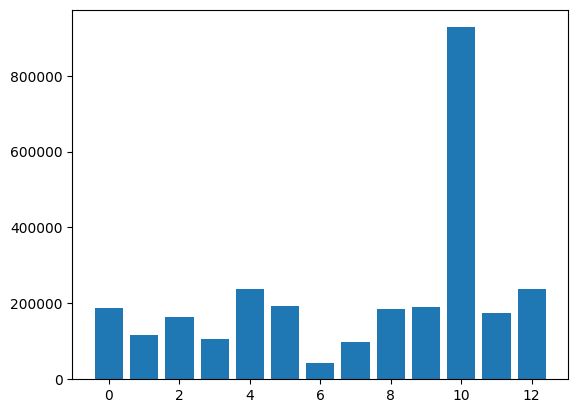

In [13]:
# Convertir etiquetas categóricas en valores numéricos con LabelEncoder

le = LabelEncoder()
y_temp = le.fit_transform(y)

# Imprimir las clases y su distribución
print(list(le.classes_))
counter = Counter(y_temp)
print(counter)
for k,v in counter.items():
    per = v / len(y_temp) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

# Graficar la distribución de las clases
plt.bar(counter.keys(), counter.values())
plt.show()

In [14]:
# Convertir etiquetas categóricas en valores numéricos con LabelEncoder

label_encoder = LabelEncoder()
df_copy = df.copy()
df_copy['activityID'] = label_encoder.fit_transform(df_copy[['activityID']])

c:\Users\eserrano\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
# Rellenar valores faltantes con la media usando SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

In [16]:
# Aplicar LabelEncoder a variable objetivo 'y'

le = LabelEncoder()
y = le.fit_transform(y)

In [17]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [18]:
# Estandarizar las características de los conjuntos de entrenamiento y prueba

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
# Implementar un Random Forest como modelo de clasificación

classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)

# Entrenar el modelo con los datos de entrenamiento

classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [20]:
# Realizar predicciones en el conjunto de prueba

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 4  4]
 [10 10]
 [ 8  8]
 ...
 [ 7  7]
 [ 8  8]
 [ 3  3]]


In [21]:
# Calcular la matriz de confusión y la precisión del modelo

cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)


0.9986190931754223

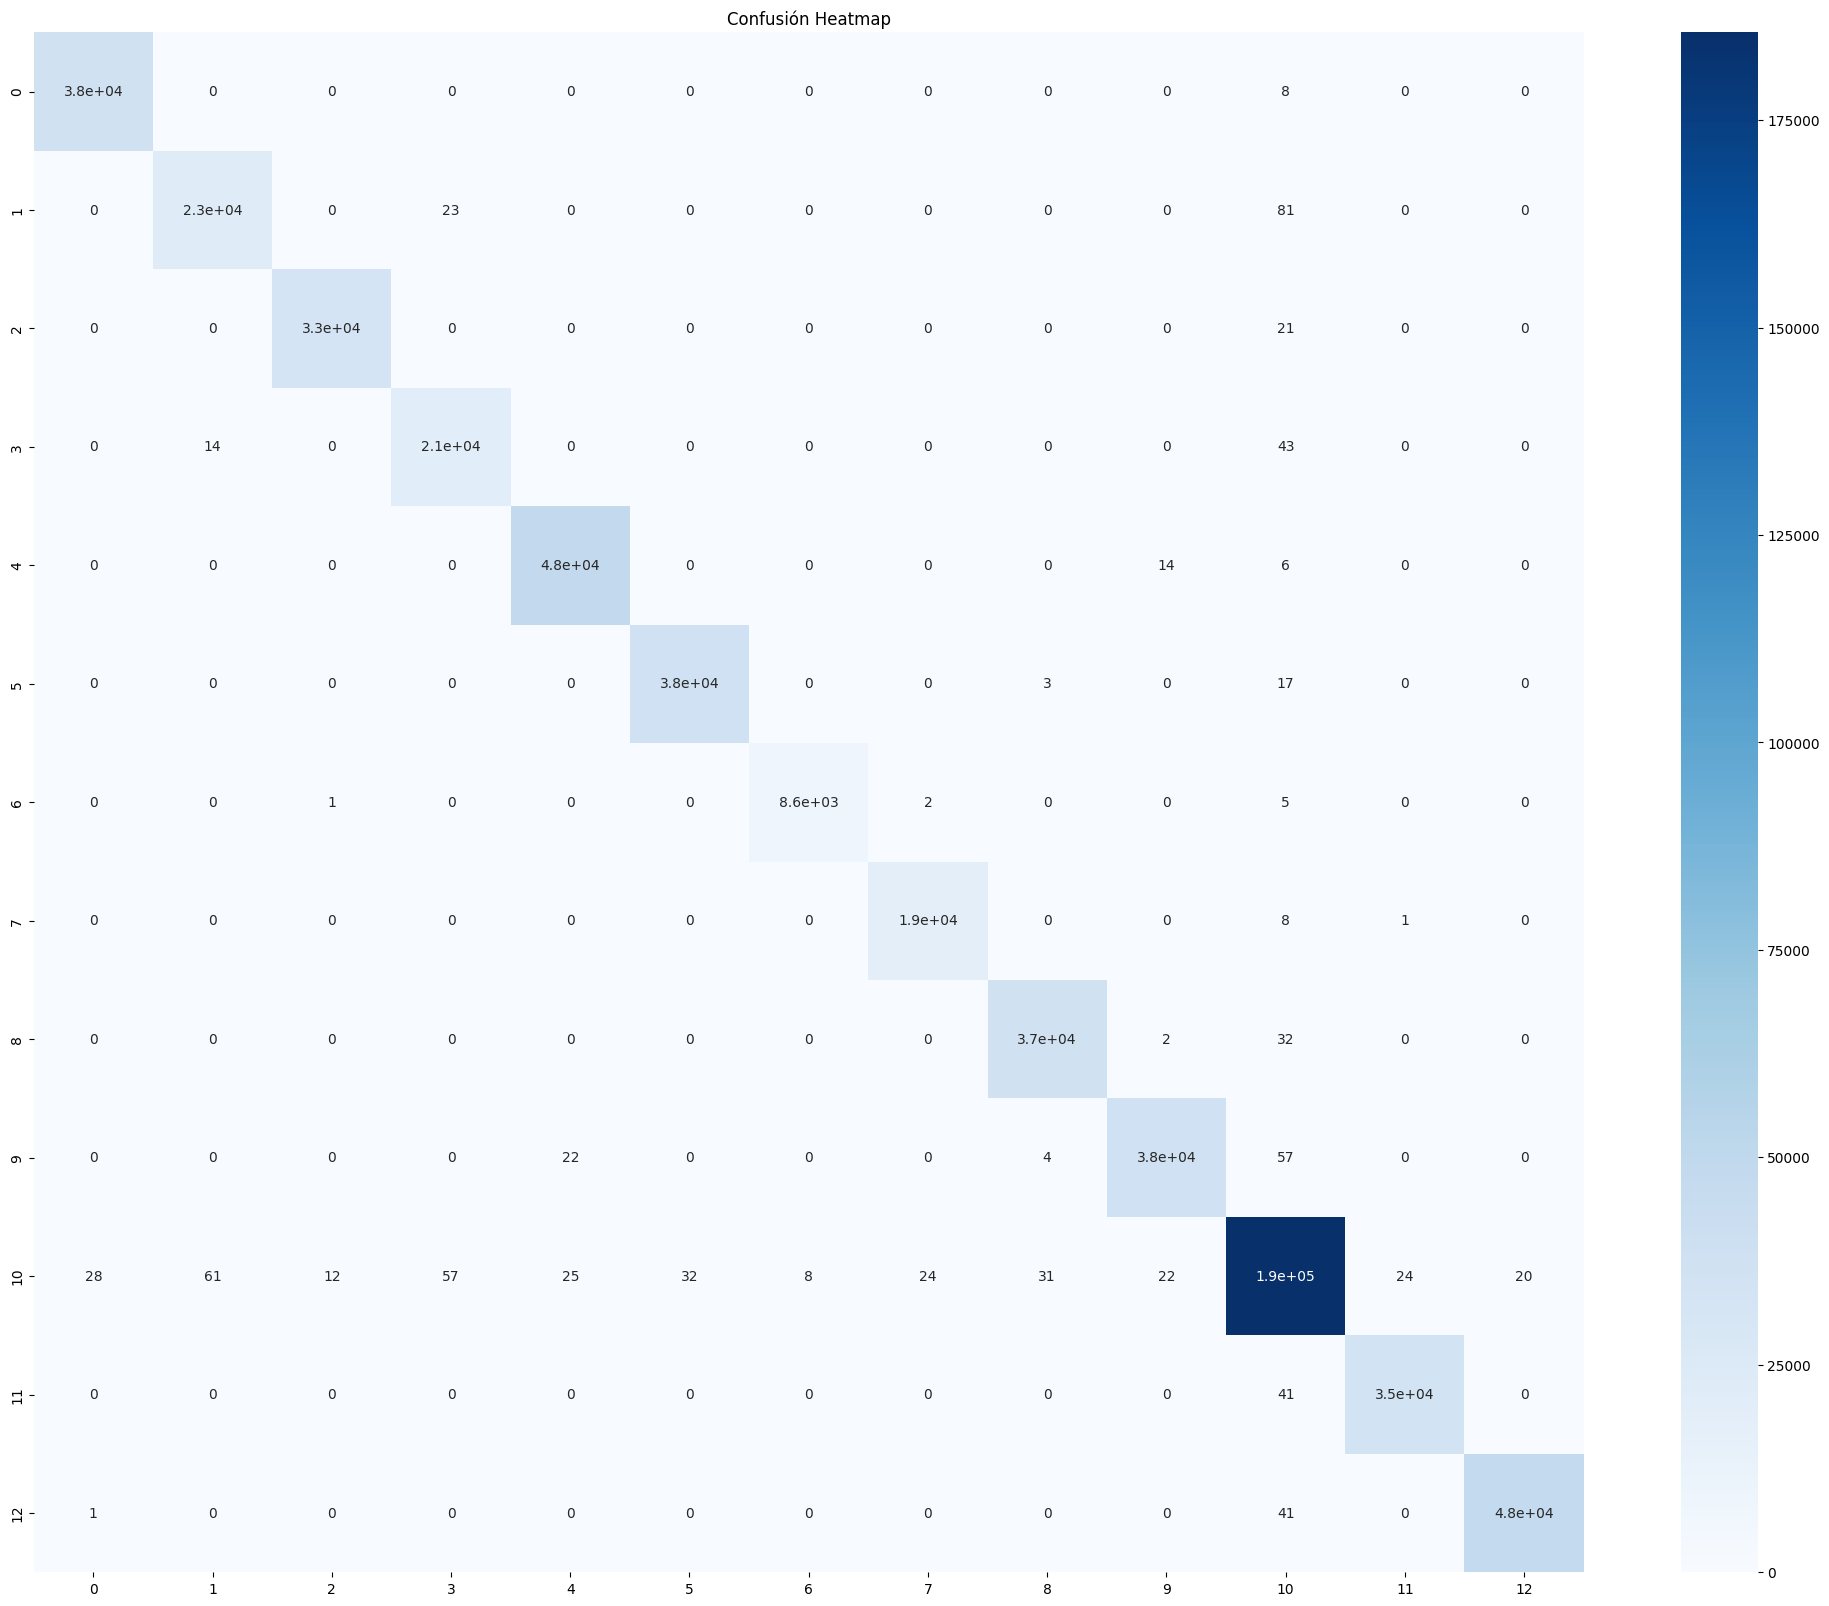

In [22]:
# Graficar la matriz de confusión como un heatmap
fig = cm
plt.figure(figsize=(25, 20))
sns.heatmap(fig, annot=True, cmap='Blues')
plt.title('Confusión Heatmap')
plt.show()